In [168]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np

In [0]:
from pathlib import Path

In [0]:
PATH_TO_DATA = Path('/content/gdrive/My Drive/mlcourse/part_3/')

In [0]:
times = ['time%s' % i for i in range(1, 11)]

In [0]:
df_train = pd.read_csv(PATH_TO_DATA / 'train_sessions.csv', index_col='session_id', parse_dates=times)

In [0]:
df_features = pd.DataFrame(index=df_train.index)

In [0]:
df_features['session_duration'] = (df_train[times].max(axis=1) - df_train[times].min(axis=1)).astype('timedelta64[ms]').astype(int)

In [0]:
df_features['year'] = df_train['time1'].apply(lambda ts: ts.year).astype('int')

In [0]:
hour = df_train['time1'].apply(lambda ts: ts.hour).astype('int')

In [0]:
df_features['morning'] = ((hour >= 7 ) & (hour <= 11)).astype('int')
df_features['day'] = ((hour >= 12) & (hour <= 17)).astype('int')
df_features['evening'] = ((hour >= 18) & (hour <= 23)).astype('int')

In [0]:
df_features['year']        = df_train['time1'].apply(lambda ts: ts.year).astype('int')
df_features['day_of_year'] = df_train['time1'].apply(lambda ts: ts.dayofyear)

In [0]:
df_features['n_day'] = df_train['time1'].apply(lambda ts: (ts.dayofyear) + (365 * (ts.year - 2013)))

In [0]:
df_features['year'] = df_features['year']  / 2014.0

In [0]:
df_features['session_duration'] = df_features['session_duration'] / df_features['session_duration'].max()

In [0]:
df_features['p2'] = (df_features['n_day'] % 2)

In [0]:
df_features['p3'] = (df_features['n_day'] % 3) / 2

In [0]:
df_features['p4'] = (df_features['n_day'] % 4) / 3

In [0]:
df_features['p5'] = (df_features['n_day'] % 5) / 4

In [0]:
df_features['p6'] = (df_features['n_day'] % 6) / 5

In [0]:
df_features['p7'] = (df_features['n_day'] % 7) / 6

In [0]:
df_features['p8'] = (df_features['n_day'] % 8) / 7

In [0]:
df_features['p9'] = (df_features['n_day'] % 9) / 8

In [0]:
df_features['p10'] = (df_features['n_day'] % 10) / 9

In [0]:
df_features['p11'] = (df_features['n_day'] % 11) / 10

In [0]:
df_features['p12'] = (df_features['n_day'] % 12) / 11

In [0]:
df_features['p13'] = (df_features['n_day'] % 13) / 12

In [0]:
df_features['p14'] = (df_features['n_day'] % 14) / 13

In [0]:
df_features['p15'] = (df_features['n_day'] % 15) / 14

In [0]:
df_features['p16'] = (df_features['n_day'] % 16) / 15

In [0]:
df_features['p17'] = (df_features['n_day'] % 17) / 16

###LOGREG

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression

In [0]:
y_train = df_train.target
drop_feat = ['day_of_year', 'n_day']
X = df_features.drop(drop_feat, axis = 1)

In [201]:
logit.fit(X, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=17, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [202]:
logit.coef_

array([[-4.33867162e+00, -1.31346946e-01, -2.53888694e+00,
         1.23799512e+00,  1.30088766e+00,  3.36393410e-01,
        -9.02758121e-01, -2.99186415e-04, -5.35912418e-02,
         1.14092485e+00, -1.77300161e+00,  1.56941410e+00,
         1.26043153e+00,  1.57054590e+00, -2.07549809e-01,
        -1.60134514e+00,  4.50086484e-01, -1.54505572e+00,
        -5.70895250e-01, -3.42718823e-01, -6.56043288e-01]])

In [203]:
%%time

time_split = TimeSeriesSplit(n_splits=10)

logit = LogisticRegression(C=1, random_state=17, solver='newton-cg')

cv_scores = cross_val_score(logit, df_features, y_train, cv=time_split,  scoring='roc_auc', n_jobs= -1)

print(cv_scores.mean())

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.8872737557400792
CPU times: user 105 ms, sys: 147 ms, total: 252 ms
Wall time: 1min 36s


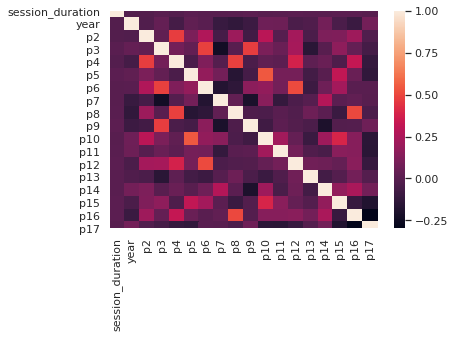

In [204]:
import seaborn as sns; sns.set()
sns.heatmap((X.drop(['morning', 'day', 'evening'], axis = 1)).corr())

In [0]:
def make_data(df_train): 
  df_features = pd.DataFrame(index=df_train.index)
  
  df_features['session_duration'] = (df_train[times].max(axis=1) - df_train[times].min(axis=1)).astype('timedelta64[ms]').astype(int)
  
  df_features['year'] = df_train['time1'].apply(lambda ts: ts.year).astype('int')
  
  hour = df_train['time1'].apply(lambda ts: ts.hour).astype('int')
  
  df_features['morning'] = ((hour >= 7 ) & (hour <= 11)).astype('int')
  df_features['day'] = ((hour >= 12) & (hour <= 17)).astype('int')
  df_features['evening'] = ((hour >= 18) & (hour <= 23)).astype('int')
  
  df_features['year']        = df_train['time1'].apply(lambda ts: ts.year).astype('int')
  df_features['day_of_year'] = df_train['time1'].apply(lambda ts: ts.dayofyear)
  
  df_features['n_day'] = df_train['time1'].apply(lambda ts: (ts.dayofyear) + (365 * (ts.year - 2013)))
  
  df_features['year'] = df_features['year']  / 2014.0
  
  df_features['session_duration'] = df_features['session_duration'] / df_features['session_duration'].max()
  
  df_features['p2'] = (df_features['n_day'] % 2)
  
  df_features['p3'] = (df_features['n_day'] % 3) / 2
  
  df_features['p4'] = (df_features['n_day'] % 4) / 3
  
  df_features['p5'] = (df_features['n_day'] % 5) / 4
  
  df_features['p6'] = (df_features['n_day'] % 6) / 5
  
  df_features['p7'] = (df_features['n_day'] % 7) / 6
  
  df_features['p8'] = (df_features['n_day'] % 8) / 7
  
  df_features['p9'] = (df_features['n_day'] % 9) / 8
  
  df_features['p10'] = (df_features['n_day'] % 10) / 9
  
  df_features['p11'] = (df_features['n_day'] % 11) / 10
  
  df_features['p12'] = (df_features['n_day'] % 12) / 11
  
  df_features['p13'] = (df_features['n_day'] % 13) / 12
  
  df_features['p14'] = (df_features['n_day'] % 14) / 13
  
  df_features['p15'] = (df_features['n_day'] % 15) / 14
  
  df_features['p16'] = (df_features['n_day'] % 16) / 15
  
  df_features['p17'] = (df_features['n_day'] % 17) / 16

  return df_features

In [0]:
df_test = pd.read_csv(PATH_TO_DATA / 'test_sessions.csv', index_col='session_id', parse_dates=times)

In [0]:
test_fetures = make_data(df_test)

In [208]:
test_fetures.head()

,session_duration,year,morning,day,evening,day_of_year,n_day,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17
session_id,,,,,,,,,,,,,,,,,,,,,,,
1,0.003889,1.0,1,0,0,277,642,0,0.0,0.666667,0.50,0.0,0.833333,0.285714,0.375,0.222222,0.4,0.545455,0.416667,0.923077,0.857143,0.133333,0.8125
2,0.047222,1.0,1,0,0,184,549,1,0.0,0.333333,1.00,0.6,0.500000,0.714286,0.000,1.000000,1.0,0.818182,0.250000,0.230769,0.642857,0.333333,0.3125
3,0.046667,1.0,0,1,0,339,704,0,1.0,0.000000,1.00,0.4,0.666667,0.000000,0.250,0.444444,0.0,0.727273,0.166667,0.307692,1.000000,0.000000,0.4375
4,0.002222,1.0,1,0,0,308,673,1,0.5,0.333333,0.75,0.2,0.166667,0.142857,0.875,0.333333,0.2,0.090909,0.833333,0.076923,0.928571,0.066667,0.6250
5,0.007222,1.0,0,1,0,136,501,1,0.0,0.333333,0.25,0.6,0.666667,0.714286,0.750,0.111111,0.6,0.818182,0.583333,0.846154,0.428571,0.333333,0.5000


In [0]:
#Fill NaN with zero values
sites = ['site%s' % i for i in range(1, 11)]
df_train[sites] = df_train[sites].fillna(0).astype(np.uint16)
df_test[sites]  =  df_test[sites].fillna(0).astype(np.uint16)

In [0]:
# United dataframe of the initial data 
df_full = pd.concat([df_train.drop('target', axis=1), df_test])

# Index to split the training and test data sets
idx_split = df_train.shape[0]

# Dataframe with indices of visited websites in session
df_full_sites = df_full[sites]

In [0]:
#Transform data into sparce matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1, 3), max_features=50000)

sessions = [" ".join([str(site) for site in row]) for row in (df_full_sites.astype('int')).values.tolist()]
full_sites_sparse = cv.fit_transform(sessions)

In [0]:
from scipy.sparse import hstack

In [0]:
X_train = hstack([df_features,  full_sites_sparse[:idx_split, :]])
X_test  = hstack([test_fetures, full_sites_sparse[idx_split:, :]])

In [214]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

time_split = TimeSeriesSplit(n_splits=10)

logit = LogisticRegression(C=0.2, random_state=17, solver='newton-cg')

cv_scores = cross_val_score(logit, X_train, y_train, cv=time_split,  scoring='roc_auc', n_jobs= -1)

cv_scores.mean()

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.9714395237601507

In [215]:
logit.fit(X_train, y_train)

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=17, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
logit_test_pred = logit.predict_proba(X_test)[:, 1]

In [0]:
def write_to_submission_file(predicted_labels, out_file, target='target', index_label="session_id"):
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [0]:
write_to_submission_file(logit_test_pred, PATH_TO_DATA / 'hypo_2.csv')